# Apple Stock Time Analysis

Bu projemizde apple'ın  son bir yıldaki hisse fiyatlarını web scraping yaparak çektik ve zaman analizi yaparak gelecek 1 ayın fiyatları tahmin edeceğiz.

<img src="https://cdnuploads.aa.com.tr/uploads/Contents/2024/06/13/thumbs_b_c_fb0dd088e9664055601fc47f9b0752b2.jpg">

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### web scraping

In [ ]:
df=pd.read_clipboard(header=None)

In [ ]:
df.columns=["Tarih","Şimdi","Açılış","Yüksek","Düşük","Hac.","Fark"]

In [ ]:
df.to_csv("apple.csv")

### Prophet

In [28]:
df=pd.read_csv("apple.csv")

In [29]:
df["Şimdi"] = df["Şimdi"].str.replace(',', '.', regex=False).astype(float)

In [30]:
df=df[["Tarih","Şimdi"]]

In [31]:
df

,Tarih,Şimdi
0,01.10.2024,226.21
1,30.09.2024,233.00
2,27.09.2024,227.79
3,26.09.2024,227.52
4,25.09.2024,226.37
...,...,...
247,06.10.2023,177.49
248,05.10.2023,174.91
249,04.10.2023,173.66
250,03.10.2023,172.40


In [32]:
df.isnull().sum()

Tarih    0
Şimdi    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tarih   252 non-null    object 
 1   Şimdi   252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [35]:
df["Tarih"] = pd.to_datetime(df["Tarih"], format='%d.%m.%Y', dayfirst=True)

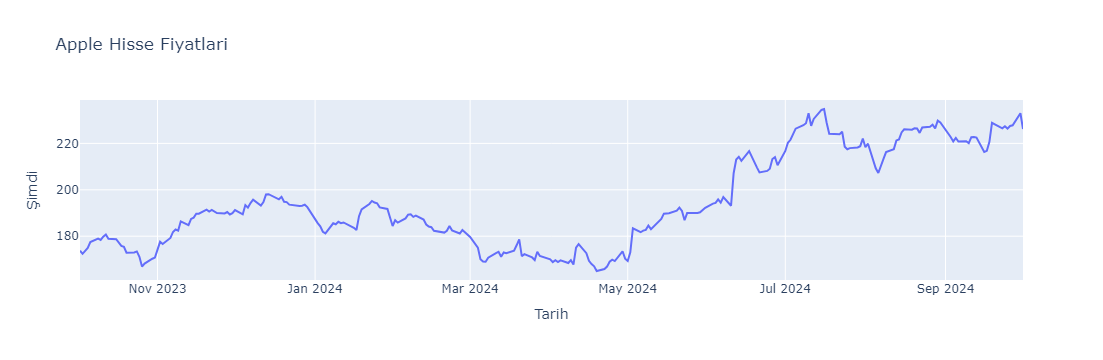

In [36]:
px.line(df,x="Tarih",y="Şimdi",title="Apple Hisse Fiyatlari")

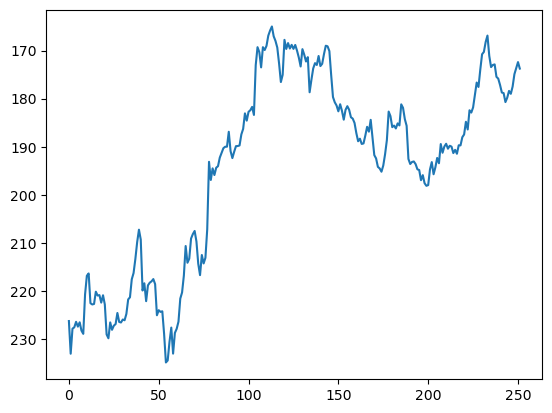

In [37]:
df.Şimdi.plot()
plt.gca().invert_yaxis() 

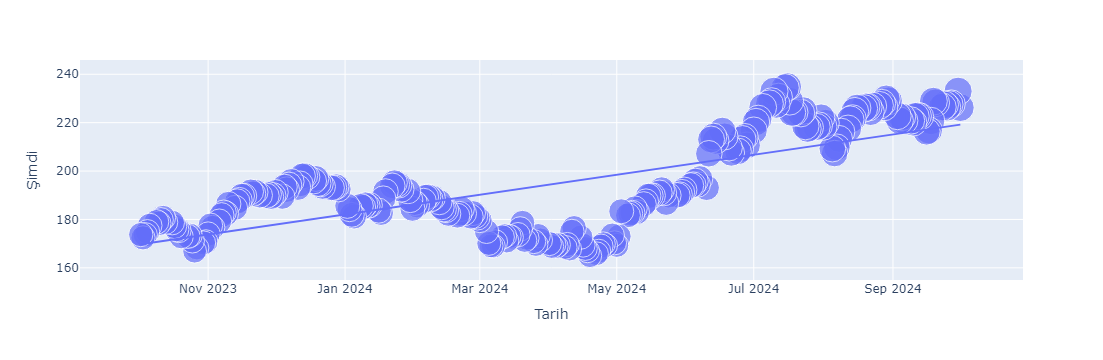

In [38]:
px.scatter(df,x="Tarih",y="Şimdi",size="Şimdi",trendline="ols")

In [39]:
forecast_data=df.rename(columns={"Tarih":"ds","Şimdi":"y"})

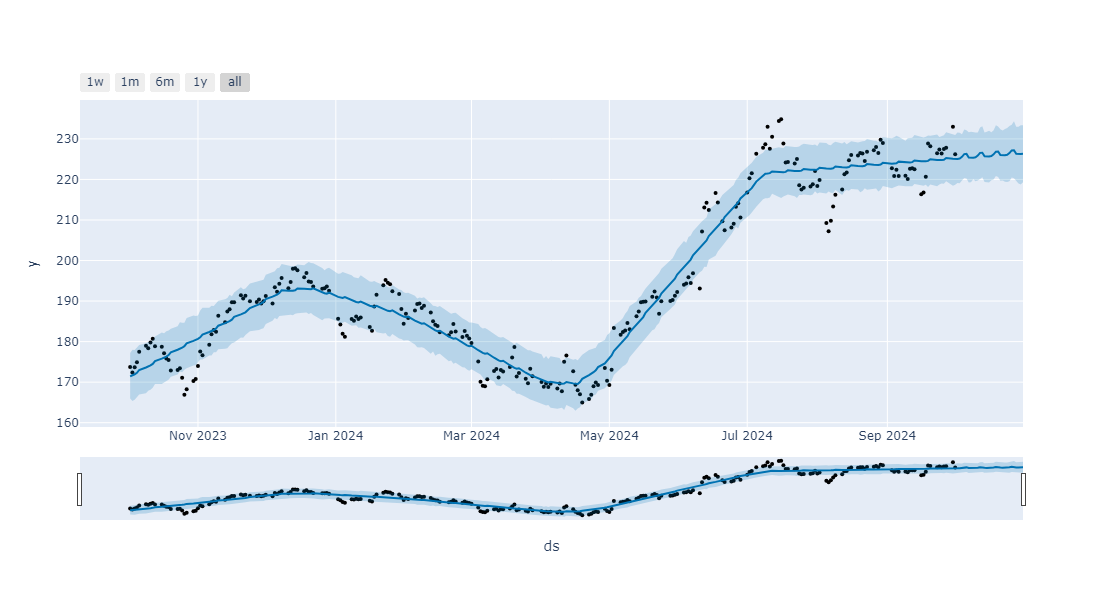

In [40]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=30)
predictions=model.predict(forecasts)
plot_plotly(model,predictions)

### SARIMA 

In [41]:
import pandas as pd
from datetime import date,timedelta
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

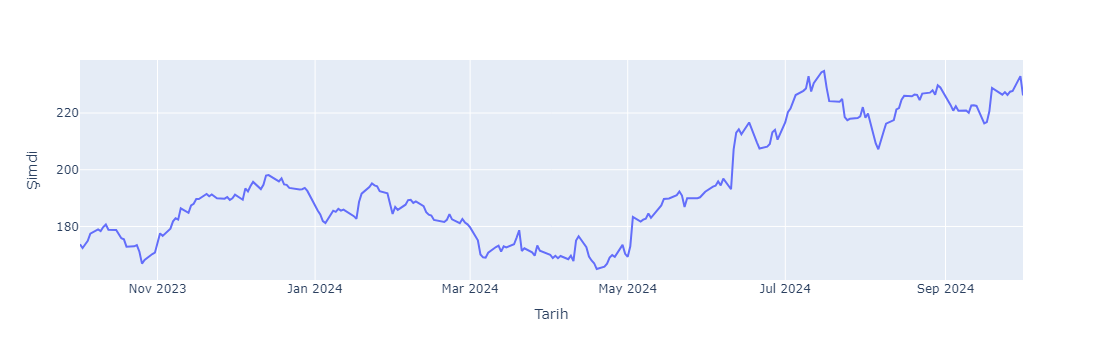

In [42]:
px.line(df,x="Tarih", y="Şimdi")

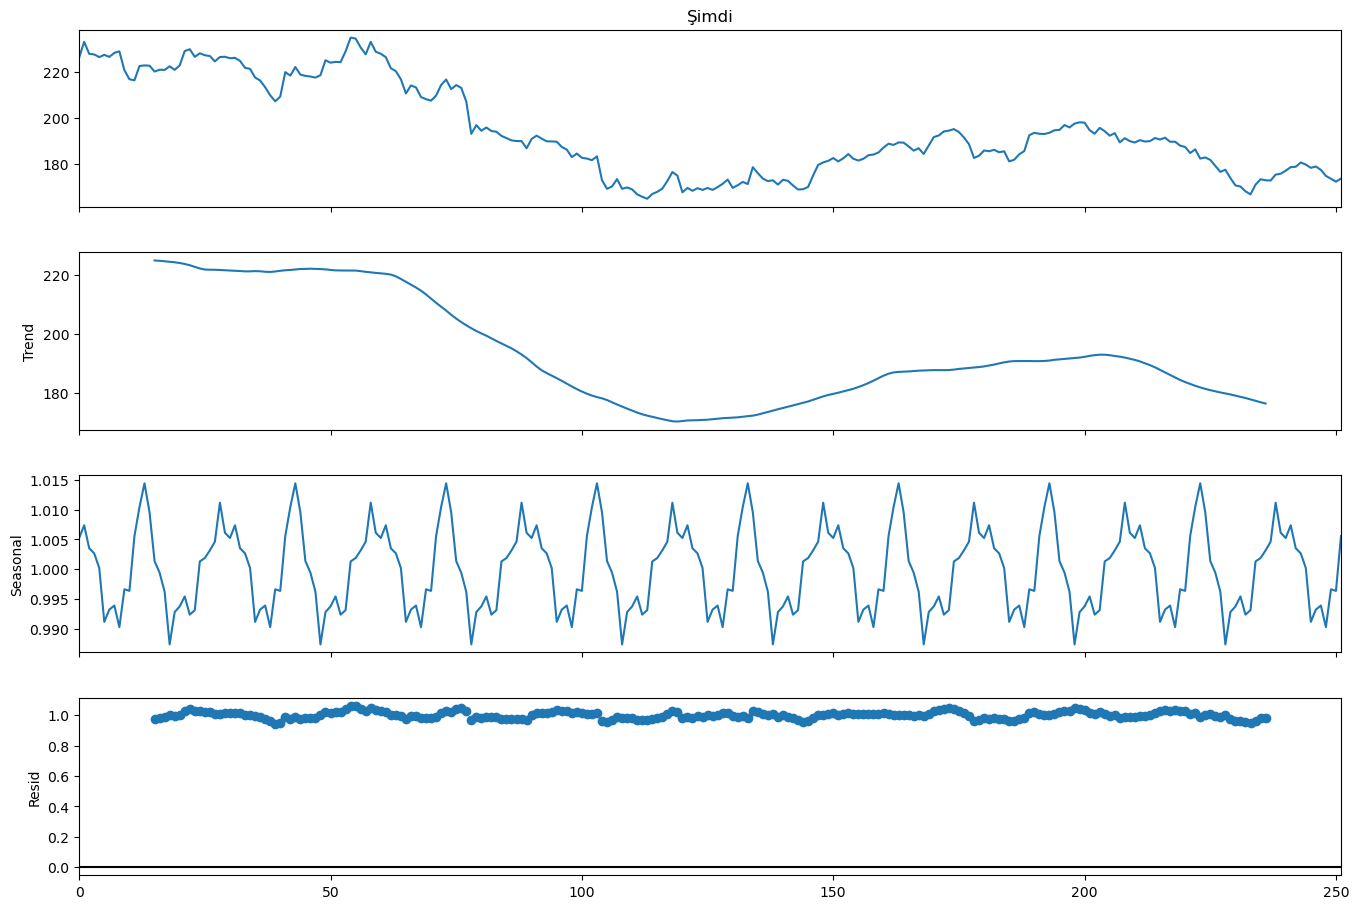

In [43]:
result=seasonal_decompose(df["Şimdi"],model="multiplicative",period=30)
fig=result.plot()
fig.set_size_inches(15,10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

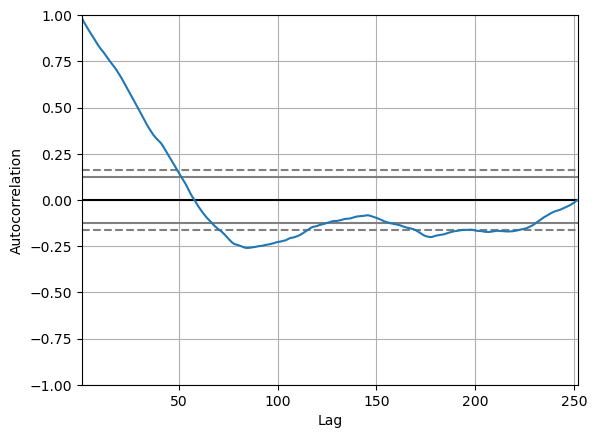

In [44]:
pd.plotting.autocorrelation_plot(df["Şimdi"])

In [45]:
model=sm.tsa.statespace.SARIMAX(df["Şimdi"])
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Şimdi   No. Observations:                  252
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -619.387
Date:                Wed, 02 Oct 2024   AIC                           1242.774
Time:                        17:27:19   BIC                           1249.833
Sample:                             0   HQIC                          1245.614
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.001   1776.284      0.000       0.999       1.001
sigma2         7.7205      0.414     18.655      0.000       6.909       8.532
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):               135.30
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
predictions=results.predict(len(df),len(df)+7)
predictions

252    173.733486
253    173.716974
254    173.700463
255    173.683954
256    173.667447
257    173.650941
258    173.634436
259    173.617934
Name: predicted_mean, dtype: float64

<Axes: >

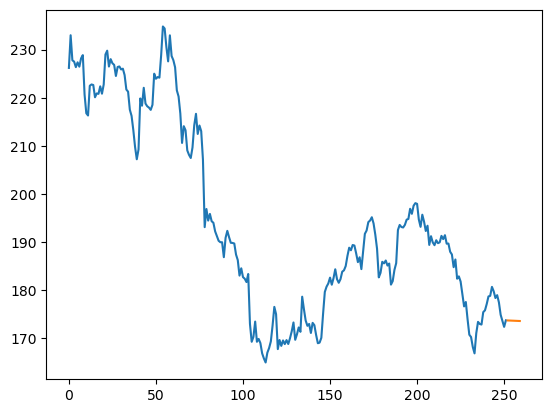

In [47]:
df["Şimdi"].plot()
predictions.plot()

### AutoTS

In [48]:
#pip install autots

In [49]:
# Kaynak = https://thecleverprogrammer.com/2021/04/19/autots-in-python-tutorial/

In [51]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=150)
model = model.fit(df, date_col='Tarih', value_col='Şimdi', id_col=None)
print("Model başarıyla eğitildi.")

Using 4 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20
Model Number: 8 with model DatepartRegression in generation 0 of 20
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.3642
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3577 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3479 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3481 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3446 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━

17:50:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 118 with model ConstantNaive in generation 0 of 20
Model Number: 119 with model SectionalMotif in generation 0 of 20
Model Number: 120 with model FFT in generation 0 of 20
Model Number: 121 with model Cassandra in generation 0 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {}, '1': {'model': 'GLS', 'phi': 0.999, 'window': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'LevelShiftTransformer', '1': 'bkfilter'}, 'transformation_params': {'0': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'last_value'}, '1': {}}}}, '2': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': False, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'med_diff', 'method_params': {'dis

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 671 with model RRVAR in generation 4 of 20
Model Number: 672 with model MultivariateRegression in generation 4 of 20
Model Number: 673 with model MultivariateRegression in generation 4 of 20
Model Number: 674 with model FFT in generation 4 of 20
Model Number: 675 with model FBProphet in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'det_order': 0, 'k_ar_diff': 2}, '1': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}}") in model 675 in generation 4: FBProphet
Model Number: 676 with model GLM in generation 4 of 20
Model Number: 677 with model AverageValueNaive in generation 4 of 20
Model Number: 678 with model NVAR in generation 4 of 20
Model Number: 679 with model SeasonalityMotif in generation 4 of 20
Model Number: 680 with model UnobservedComponents in generation 4 of 20
Template Eval Error: LinAlgError('Singular

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 785 with model MultivariateMotif in generation 5 of 20
Model Number: 786 with model Theta in generation 5 of 20
Model Number: 787 with model Theta in generation 5 of 20
Model Number: 788 with model UnobservedComponents in generation 5 of 20
Model Number: 789 with model RRVAR in generation 5 of 20
Model Number: 790 with model DMD in generation 5 of 20
Model Number: 791 with model SeasonalNaive in generation 5 of 20
Model Number: 792 with model Theta in generation 5 of 20
Model Number: 793 with model RRVAR in generation 5 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params cubic {'0': {'method': 0.2}, '1': {'lag_1': 4, 'method': 'LastValue'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '4': {'regression_model': {'mode

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 903 in generation 6: MultivariateRegression
Model Number: 904 with model ConstantNaive in generation 6 of 20
Model Number: 905 with model WindowRegression in generation 6 of 20
Model Number: 906 with model NVAR in generation 6 of 20
Model Number: 907 with model SeasonalNaive in generation 6 of 20
Model Number: 908 with model SectionalMotif in generation 6 of 20
Model Number: 909 with model MultivariateRegression in generation 6 of 20
Model Number: 910 with model SectionalMotif in generation 6 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 910 in generation 6: SectionalMotif
Model Number: 911 with model MetricMotif in generation 6 of 20
Model Number: 912 with model SectionalMotif in generation 6 of 20
Model Number: 913 with model ARIMA in 

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 965 with model MultivariateRegression in generation 6 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 965 in generation 6: MultivariateRegression
Model Number: 966 with model UnobservedComponents in generation 6 of 20
Model Number: 967 with model NVAR in generation 6 of 20
Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse from params nearest {\'0\': {\'rows\': 1, \'displacement_rows\': 1, \'quantile\': 1.0, \'decay_span\': 365}, \'1\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 40}, \'2\': {}, \'3\': {\'model_name\': \'MA\', \'state_transition\': [[1, 0], [1, 0]], \'process_noise\': [[0.2, 0.0], [0.0, 0]], \'observation_model\': [[1, 0.1]], \'observation_noise\': 1.0, \'em_iter\': 10, \'on_transform\': True, \'on_inverse\': False}} with ValueError("Input X contains infinity or a value too large for dtype(\'float64\').")') in model 967 in generation 6: NVAR
Model Number: 968 with model Datep

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1045 with model MultivariateRegression in generation 7 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1045 in generation 7: MultivariateRegression
Model Number: 1046 with model RRVAR in generation 7 of 20
Model Number: 1047 with model SeasonalityMotif in generation 7 of 20
Model Number: 1048 with model NVAR in generation 7 of 20
Model Number: 1049 with model ARIMA in generation 7 of 20
Model Number: 1050 with model LastValueNaive in generation 7 of 20
Model Number: 1051 with model UnivariateMotif in generation 7 of 20
Model Number: 1052 with model DMD in generation 7 of 20
Model Number: 1053 with model LastValueNaive in generation 7 of 20
Model Number: 1054 with model WindowRegression in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params cubic {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'lag_1': 60, 'method': 5}, '2': {'decimals': 0, 'on_trans

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1272 with model UnobservedComponents in generation 9 of 20
Model Number: 1273 with model MultivariateRegression in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1273 in generation 9: MultivariateRegression
Model Number: 1274 with model ConstantNaive in generation 9 of 20
Model Number: 1275 with model MultivariateRegression in generation 9 of 20
Model Number: 1276 with model WindowRegression in generation 9 of 20
Model Number: 1277 with model ARIMA in generation 9 of 20
Model Number: 1278 with model DMD in generation 9 of 20
Model Number: 1279 with model SeasonalNaive in generation 9 of 20
Model Number: 1280 with model SeasonalNaive in generation 9 of 20
Model Number: 1281 with model ARIMA in generation 9 of 20
Model Number: 1282 with model SeasonalityMotif in generation 9 of 20
prediction too long for indepedent=False, falling back on indepdent=True
Model Number: 1283 with model SeasonalNaive in ge

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1372 with model DMD in generation 10 of 20
Model Number: 1373 with model SectionalMotif in generation 10 of 20
Model Number: 1374 with model SeasonalNaive in generation 10 of 20
Model Number: 1375 with model RRVAR in generation 10 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill_mean_biased {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'pchip', 'transformations': {'0': 'FFTDecomposition', '1': 'AlignLastValue'}, 'transformation_params': {'0': {'n_harmonics': 20, 'detrend': 'quadratic'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'thre

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1384 with model NVAR in generation 10 of 20
Model Number: 1385 with model WindowRegression in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1385 in generation 10: WindowRegression
Model Number: 1386 with model DMD in generation 10 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean {'0': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': True, 'anomaly_detector_params': {'method': 'med_diff', 'method_params': {'distribution': 'norm', 'alpha': 0.03}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'anomaly_score', 'regression_params': {}}, '1': {}, '2': {'output_distribution': 'uniform', 'n_qu

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1402 with model UnobservedComponents in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1402 in generation 10: UnobservedComponents
Model Number: 1403 with model DMD in generation 10 of 20
Model Number: 1404 with model MetricMotif in generation 10 of 20
Template Eval Error: ValueError('Shape of passed values is (30, 2), indices imply (30, 1)') in model 1404 in generation 10: MetricMotif
Model Number: 1405 with model Theta in generation 10 of 20
Model Number: 1406 with model UnobservedComponents in generation 10 of 20
Model Number: 1407 with model SeasonalityMotif in generation 10 of 20
Model Number: 1408 with model NVAR in generation 10 of 20
Model Number: 1409 with model ETS in generation 10 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength'

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1450 with model UnobservedComponents in generation 11 of 20
Model Number: 1451 with model UnobservedComponents in generation 11 of 20
Model Number: 1452 with model ETS in generation 11 of 20
Model Number: 1453 with model LastValueNaive in generation 11 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'decimals': 1, 'on_transform': False, 'on_inverse': True}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1461 in generation 11: MultivariateRegression
Model Number: 1462 with model UnobservedComponents in generation 11 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1462 in generation 11: UnobservedComponents
Model Number: 1463 with model LastValueNaive in generation 11 of 20
Model Number: 1464 with model SeasonalNaive in generation 11 of 20
Model Number: 1465 with model UnobservedComponents in generation 11 of 20
Model Number: 1466 with model AverageValueNaive in generation 11 of 20
Model Number: 1467 with model SeasonalityMotif in generation 11 of 20
Model Number: 1468 with model RRVAR in generation 11 of 20
Template Eval Error: Exception("Transformer PCA failed on fit from params linear {'0': {}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1663 with model UnobservedComponents in generation 14 of 20
Model Number: 1664 with model SeasonalityMotif in generation 14 of 20
Model Number: 1665 with model SeasonalityMotif in generation 14 of 20
Model Number: 1666 with model AverageValueNaive in generation 14 of 20
Model Number: 1667 with model NVAR in generation 14 of 20
Model Number: 1668 with model DMD in generation 14 of 20
Model Number: 1669 with model SeasonalNaive in generation 14 of 20
Model Number: 1670 with model WindowRegression in generation 14 of 20
Model Number: 1671 with model AverageValueNaive in generation 14 of 20
Model Number: 1672 with model GLM in generation 14 of 20
Model Number: 1673 with model AverageValueNaive in generation 14 of 20
Model Number: 1674 with model SectionalMotif in generation 14 of 20
Model Number: 1675 with model Theta in generation 14 of 20
Model Number: 1676 with model MultivariateRegression in generation 14 of 20

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.




Model Number: 1677 with model WindowRegression in generation 14 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1677 in generation 14: WindowRegression
Model Number: 1678 with model DMD in generation 14 of 20
Model Number: 1679 with model DMD in generation 14 of 20
Model Number: 1680 with model Theta in generation 14 of 20
Model Number: 1681 with model SeasonalityMotif in generation 14 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params time {'0': {}, '1': {}, '2': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}, '3': {'span': 28}, '4': {'output_distribution': 'uniform', 'n_quantiles': 40}, '5': {'det_order': 1, 'k_ar_diff': 0}}") in model 1681 in generation 14: SeasonalityMotif
Model Number: 1682 with model ConstantNaive in generation 14 of 20
Model Number: 1683 with model WindowRegression in generation 14 of 20
Model Number: 1

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1709 with model UnobservedComponents in generation 14 of 20
Model Number: 1710 with model SeasonalityMotif in generation 14 of 20
Model Number: 1711 with model GLM in generation 14 of 20
Model Number: 1712 with model LastValueNaive in generation 14 of 20
Model Number: 1713 with model GLM in generation 14 of 20
Model Number: 1714 with model ETS in generation 14 of 20
Model Number: 1715 with model SeasonalityMotif in generation 14 of 20
Model Number: 1716 with model GLM in generation 14 of 20
Model Number: 1717 with model UnobservedComponents in generation 14 of 20
Model Number: 1718 with model LastValueNaive in generation 14 of 20
Model Number: 1719 with model UnobservedComponents in generation 14 of 20
Model Number: 1720 with model GLM in generation 14 of 20


C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 1721 with model SectionalMotif in generation 14 of 20
Model Number: 1722 with model RRVAR in generation 14 of 20
Model Number: 1723 with model NVAR in generation 14 of 20
Model Number: 1724 with model AverageValueNaive in generation 14 of 20
Model Number: 1725 with model WindowRegression in generation 14 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params nearest {'0': {'span': 60}, '1': {'output_distribution': 'uniform', 'n_quantiles': 40}, '2': {}, '3': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': True}, 'fillna': 'mean', 'transform_dict': None, 'isolated_only': False}, 'remove_e

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1825 with model Theta in generation 15 of 20
Model Number: 1826 with model NVAR in generation 15 of 20
Model Number: 1827 with model WindowRegression in generation 15 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1827 in generation 15: WindowRegression
Model Number: 1828 with model UnobservedComponents in generation 15 of 20
Model Number: 1829 with model ETS in generation 15 of 20
Model Number: 1830 with model MultivariateRegression in generation 15 of 20
New Generation: 16 of 20
Model Number: 1831 with model ConstantNaive in generation 16 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {'rows': 7, 'displacement_rows': 1, 'quantile': 0, 'decay_span': None}, '3':

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1836 with model SeasonalNaive in generation 16 of 20
Model Number: 1837 with model RRVAR in generation 16 of 20
Model Number: 1838 with model LastValueNaive in generation 16 of 20
Model Number: 1839 with model MultivariateRegression in generation 16 of 20
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 1839 in generation 16: MultivariateRegression
Model Number: 1840 with model ARIMA in generation 16 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1840 in generation 16: ARIMA
Model Number: 1841 with model SeasonalityMotif in generation 16 of 20
Model Number: 1842 with model RRVAR in generation 16 of 20
Model Number: 1843 with model SeasonalNaive in generation 16 of 20
Model Number: 1844 with model SeasonalityMotif in generation 16 of 20
Model Number: 1845 with model AverageValueNaive in generation 16 of 20
Model Number: 1846 with model NVAR in

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 2036 with model SeasonalityMotif in generation 18 of 20
Model Number: 2037 with model WindowRegression in generation 18 of 20
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 2037 in generation 18: WindowRegression
Model Number: 2038 with model SeasonalityMotif in generation 18 of 20
Model Number: 2039 with model GLM in generation 18 of 20
Model Number: 2040 with model AverageValueNaive in generation 18 of 20


C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 2041 with model LastValueNaive in generation 18 of 20
Model Number: 2042 with model AverageValueNaive in generation 18 of 20
Model Number: 2043 with model Theta in generation 18 of 20
Model Number: 2044 with model UnobservedComponents in generation 18 of 20
Model Number: 2045 with model AverageValueNaive in generation 18 of 20
Model Number: 2046 with model SeasonalNaive in generation 18 of 20
Model Number: 2047 with model LastValueNaive in generation 18 of 20
Model Number: 2048 with model DMD in generation 18 of 20
ECR rank is 0
Model Number: 2049 with model Theta in generation 18 of 20
Model Number: 2050 with model MultivariateRegression in generation 18 of 20
Model Number: 2051 with model SectionalMotif in generation 18 of 20
Model Number: 2052 with model WindowRegression in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 2052 in generation 18: WindowRegression
Model Number: 2053 with model DMD in gen

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 2064 in generation 18: GLM
Model Number: 2065 with model GLM in generation 18 of 20
Model Number: 2066 with model NVAR in generation 18 of 20
Model Number: 2067 with model SeasonalNaive in generation 18 of 20
Model Number: 2068 with model LastValueNaive in generation 18 of 20
Model Number: 2069 with model SeasonalNaive in generation 18 of 20
Model Number: 2070 with model ETS in generation 18 of 20
Model Number: 2071 with model UnobservedComponents in generation 18 of 20
Model Number: 2072 with model UnobservedComponents in generation 18 of 20
Model Number: 2073 with model GLM in generation 18 of 20
Template Eval Error: UnboundLocalError("cannot access local variable 'Xf' where it is not associated with a value") in model 2073 in generation 18: GLM
Model Number: 2074 with model RRVAR in generation 18 of 20
Model Number: 2075 with

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



137 - Theta with avg smape 3.84: 
Model Number: 138 of 321 with model MultivariateRegression for Validation 1
138 - MultivariateRegression with avg smape 3.57: 
Model Number: 139 of 321 with model MultivariateRegression for Validation 1
139 - MultivariateRegression with avg smape 2.73: 
Model Number: 140 of 321 with model SectionalMotif for Validation 1
140 - SectionalMotif with avg smape 2.83: 
Model Number: 141 of 321 with model NVAR for Validation 1
141 - NVAR with avg smape 11.37: 
Model Number: 142 of 321 with model NVAR for Validation 1
142 - NVAR with avg smape 3.41: 
Model Number: 143 of 321 with model FBProphet for Validation 1
143 - FBProphet with avg smape 58.03: 
Model Number: 144 of 321 with model MultivariateRegression for Validation 1
144 - MultivariateRegression with avg smape 2.66: 
Model Number: 145 of 321 with model WindowRegression for Validation 1
145 - WindowRegression with avg smape 3.53: 
Model Number: 146 of 321 with model RRVAR for Validation 1
146 - RRVAR wit

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



137 - Theta with avg smape 9.64: 
Model Number: 138 of 321 with model MultivariateRegression for Validation 2
138 - MultivariateRegression with avg smape 9.19: 
Model Number: 139 of 321 with model MultivariateRegression for Validation 2
139 - MultivariateRegression with avg smape 10.09: 
Model Number: 140 of 321 with model SectionalMotif for Validation 2
140 - SectionalMotif with avg smape 9.47: 
Model Number: 141 of 321 with model NVAR for Validation 2
141 - NVAR with avg smape 9.6: 
Model Number: 142 of 321 with model NVAR for Validation 2
142 - NVAR with avg smape 10.22: 
Model Number: 143 of 321 with model FBProphet for Validation 2
143 - FBProphet with avg smape 61.65: 
Model Number: 144 of 321 with model MultivariateRegression for Validation 2
144 - MultivariateRegression with avg smape 10.96: 
Model Number: 145 of 321 with model WindowRegression for Validation 2
145 - WindowRegression with avg smape 9.01: 
Model Number: 146 of 321 with model RRVAR for Validation 2
146 - RRVAR wi

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



137 - Theta with avg smape 9.06: 
Model Number: 138 of 321 with model MultivariateRegression for Validation 3
138 - MultivariateRegression with avg smape 5.99: 
Model Number: 139 of 321 with model MultivariateRegression for Validation 3
139 - MultivariateRegression with avg smape 5.82: 
Model Number: 140 of 321 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 140 in generation 0: SectionalMotif
Model Number: 141 of 321 with model NVAR for Validation 3
141 - NVAR with avg smape 6.06: 
Model Number: 142 of 321 with model NVAR for Validation 3
142 - NVAR with avg smape 6.33: 
Model Number: 143 of 321 with model FBProphet for Validation 3
143 - FBProphet with avg smape 59.24: 
Model Number: 144 of 321 with model MultivariateRegression for Validation 3
144 - MultivariateRegression with avg smape 8.3: 
Model Number: 145 of 321 with model WindowRegression for Validation 3
145 - WindowRegres

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 3195 with model Ensemble in generation 22 of Ensembles


C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 3196 with model Ensemble in generation 22 of Ensembles
Model Number: 3197 with model Ensemble in generation 22 of Ensembles
Model Number: 3198 with model Ensemble in generation 22 of Ensembles
Model Number: 3199 with model Ensemble in generation 22 of Ensembles
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 194.9826
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.8184 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.6419 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.4257 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.1598 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193.8766 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193.5121 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193.0489 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 192.5719 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 192.0249 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191.461

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



📈 1 - Ensemble with avg smape 2.87: 
Model Number: 2 of 8 with model Ensemble for Validation 1


C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



📈 2 - Ensemble with avg smape 2.69: 
Model Number: 3 of 8 with model Ensemble for Validation 1
3 - Ensemble with avg smape 3.38: 
Model Number: 4 of 8 with model Ensemble for Validation 1
4 - Ensemble with avg smape 3.38: 
Model Number: 5 of 8 with model Ensemble for Validation 1
5 - Ensemble with avg smape 2.96: 
Model Number: 6 of 8 with model Ensemble for Validation 1
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 185.2657
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185.1643 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185.0616 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184.9460 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184.8209 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 184.6937 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184.5293 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 184.3376 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184.1131 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



📈 1 - Ensemble with avg smape 6.03: 
Model Number: 2 of 8 with model Ensemble for Validation 2


C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



2 - Ensemble with avg smape 7.56: 
Model Number: 3 of 8 with model Ensemble for Validation 2
📈 3 - Ensemble with avg smape 5.81: 
Model Number: 4 of 8 with model Ensemble for Validation 2
4 - Ensemble with avg smape 9.09: 
Model Number: 5 of 8 with model Ensemble for Validation 2
5 - Ensemble with avg smape 6.24: 
Model Number: 6 of 8 with model Ensemble for Validation 2
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 175.0768
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 175.0238 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174.9473 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174.8665 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 174.8002 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174.7192 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174.6286 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174.5452 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174.4617 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━

C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



📈 1 - Ensemble with avg smape 5.62: 
Model Number: 2 of 8 with model Ensemble for Validation 3


C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



📈 2 - Ensemble with avg smape 5.47: 
Model Number: 3 of 8 with model Ensemble for Validation 3
3 - Ensemble with avg smape 6.03: 
Model Number: 4 of 8 with model Ensemble for Validation 3
4 - Ensemble with avg smape 5.87: 
Model Number: 5 of 8 with model Ensemble for Validation 3
5 - Ensemble with avg smape 5.72: 
Model Number: 6 of 8 with model Ensemble for Validation 3
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 171.0814
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 171.0505
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 171.0210
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 170.9753
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 170.9317
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 170.9229
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 170.8641
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 170.8365
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 170.7856
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━

In [52]:
prediction = model.predict()
forecast = prediction.forecast
print("Stock Price Prediction of Apple")
print(forecast)

Stock Price Prediction of Apple
                 Şimdi
2024-10-02  229.170393
2024-10-03  229.107115
2024-10-04  229.218426
2024-10-07  229.195857
2024-10-08  229.402834
2024-10-09  229.305168
2024-10-10  229.474329
2024-10-11  229.495844
2024-10-14  229.526064
2024-10-15  229.578997
2024-10-16  229.500988
2024-10-17  229.601252
2024-10-18  229.564923
2024-10-21  229.677035
2024-10-22  229.742266
2024-10-23  229.698688
2024-10-24  229.801030
2024-10-25  229.779026
2024-10-28  229.903167
2024-10-29  229.962939
2024-10-30  229.936515
2024-10-31  230.031225
2024-11-01  230.015863
2024-11-04  230.144623
2024-11-05  230.196916
2024-11-06  230.182477
2024-11-07  230.268447
2024-11-08  230.258150
2024-11-11  230.389094
2024-11-12  230.434879


C:\Users\erkan\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



<Axes: >

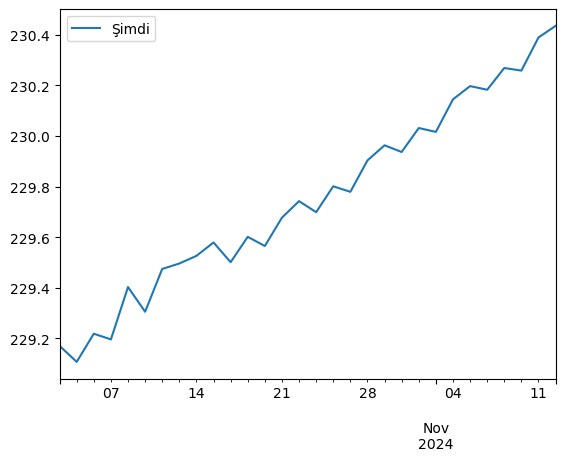

In [53]:
forecast.plot()

Sonuc olarak datamızı çektik ve Prophet, SARIMA ve AutoTS kullanarak önümüzdeki 1 ayın fiyatlarını tahmin ettik.